In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
dataset=pd.read_csv('../Dataset/with_aggregated.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420481 entries, 0 to 5420480
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   step                     int64  
 2   action                   object 
 3   amount                   float64
 4   nameOrig                 object 
 5   oldBalanceOrig           float64
 6   newBalanceOrig           float64
 7   nameDest                 object 
 8   oldBalanceDest           float64
 9   newBalanceDest           float64
 10  isFraud                  int64  
 11  isFlaggedFraud           int64  
 12  isUnauthorizedOverdraft  int64  
 13  amount1h                 float64
 14  amount1d                 float64
 15  amount7d                 float64
 16  amount30d                float64
 17  count1h                  int64  
 18  count1d                  int64  
 19  count7d                  int64  
 20  count30d                 int64  
 21  mean_1h 

In [4]:
dataset.columns

Index(['Unnamed: 0', 'step', 'action', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFraud', 'isFlaggedFraud', 'isUnauthorizedOverdraft', 'amount1h',
       'amount1d', 'amount7d', 'amount30d', 'count1h', 'count1d', 'count7d',
       'count30d', 'mean_1h', 'mean_1d', 'mean_7d', 'mean_30d', 'time_x',
       'time_y'],
      dtype='object')

In [5]:
dataset.head()

,Unnamed: 0,step,action,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,...,count1h,count1d,count7d,count30d,mean_1h,mean_1d,mean_7d,mean_30d,time_x,time_y
0,0,0,TRANSFER,51.47,C5155482480,51.47,0.0,CC2160409073,0.0,51.47,...,1,1,1,1,51.47,51.47,51.47,51.47,1.0,0.0
1,1,0,CASH_OUT,51.47,CC2160409073,51.47,0.0,M2788501400,0.0,0.00,...,1,1,1,1,51.47,51.47,51.47,51.47,1.0,0.0
2,2,0,TRANSFER,306.06,C6262505545,306.06,0.0,CC9524765415,0.0,306.06,...,1,1,1,1,306.06,306.06,306.06,306.06,1.0,0.0
3,3,0,CASH_OUT,306.06,CC9524765415,306.06,0.0,M3707455010,0.0,0.00,...,1,1,1,1,306.06,306.06,306.06,306.06,1.0,0.0
4,4,0,TRANSFER,32.72,C6865329088,32.72,0.0,CC8773639961,0.0,32.72,...,1,1,1,1,32.72,32.72,32.72,32.72,1.0,0.0


In [7]:
dataset.describe()

,Unnamed: 0,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,isUnauthorizedOverdraft,...,count1h,count1d,count7d,count30d,mean_1h,mean_1d,mean_7d,mean_30d,time_x,time_y
count,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5420481.0,5.420481e+06,...,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06,5.420481e+06
mean,2.710240e+06,3.469915e+02,1.522065e+05,2.836159e+06,2.803814e+06,1.094253e+06,1.141631e+06,1.119200e-02,0.0,3.523673e-03,...,1.992072e+00,3.681589e+01,2.212599e+02,5.263266e+02,1.527159e+05,1.537227e+05,1.563280e+05,1.628940e+05,1.361243e-01,-2.827056e-01
std,1.564758e+06,2.033000e+02,4.616741e+05,1.241356e+06,1.240052e+06,9.439432e+05,1.022038e+06,1.051986e-01,0.0,5.925586e-02,...,8.207649e-01,1.103835e+01,7.389455e+01,3.090891e+02,4.276221e+05,3.554843e+05,3.520115e+05,3.180904e+05,7.457138e-01,5.877574e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.981883e+05,-1.981883e+05,-1.035605e+05,-5.686381e+04,0.000000e+00,0.0,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,-1.000000e+00,-1.000000e+00
25%,1.355120e+06,1.870000e+02,9.760900e+03,2.124121e+06,2.095848e+06,4.294826e+05,4.570944e+05,0.000000e+00,0.0,0.000000e+00,...,1.000000e+00,3.200000e+01,2.090000e+02,2.590000e+02,3.873080e+04,8.722407e+04,1.042422e+05,1.243150e+05,-7.071068e-01,-8.660254e-01
50%,2.710240e+06,3.320000e+02,8.657401e+04,2.983071e+06,2.968546e+06,1.005583e+06,1.032950e+06,0.000000e+00,0.0,0.000000e+00,...,2.000000e+00,3.800000e+01,2.370000e+02,5.260000e+02,9.275587e+04,1.165504e+05,1.297950e+05,1.374986e+05,2.588190e-01,-5.000000e-01
75%,4.065360e+06,5.200000e+02,1.607915e+05,3.527875e+06,3.513442e+06,1.640584e+06,1.662350e+06,0.000000e+00,0.0,0.000000e+00,...,3.000000e+00,4.400000e+01,2.770000e+02,7.940000e+02,1.500492e+05,1.562644e+05,1.548015e+05,1.525465e+05,8.660254e-01,2.588190e-01
max,5.420480e+06,7.190000e+02,2.463874e+07,2.611844e+07,2.610478e+07,2.762248e+07,2.786732e+07,1.000000e+00,0.0,1.000000e+00,...,5.000000e+00,6.900000e+01,3.180000e+02,1.071000e+03,2.463874e+07,2.463874e+07,2.463874e+07,2.463874e+07,1.000000e+00,1.000000e+00


In [8]:
total_null_values=dataset.isnull().sum().sort_values(ascending=False)
total_null_values

Unnamed: 0                 0
amount1d                   0
time_x                     0
mean_30d                   0
mean_7d                    0
mean_1d                    0
mean_1h                    0
count30d                   0
count7d                    0
count1d                    0
count1h                    0
amount30d                  0
amount7d                   0
amount1h                   0
step                       0
isUnauthorizedOverdraft    0
isFlaggedFraud             0
isFraud                    0
newBalanceDest             0
oldBalanceDest             0
nameDest                   0
newBalanceOrig             0
oldBalanceOrig             0
nameOrig                   0
amount                     0
action                     0
time_y                     0
dtype: int64

In [19]:
dataset['isFraud'].value_counts()

0    5359815
1      60666
Name: isFraud, dtype: int64

In [9]:
import seaborn as sns

In [11]:
target=dataset['isFraud']

For checking the imbalance in the data set

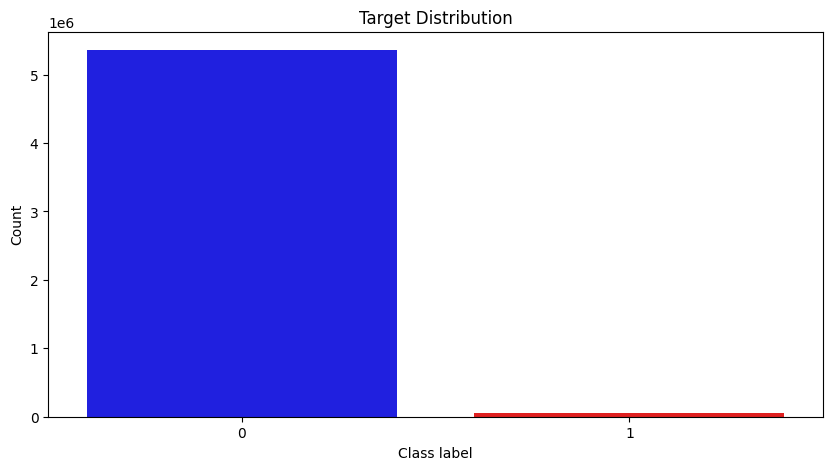

In [24]:
palette = {0: "blue", 1: "red"}
plt.figure(figsize=(10, 5))
sns.countplot(x='isFraud', data=dataset, hue='isFraud', palette=palette, dodge=False, legend=False)
plt.title('Target Distribution')
plt.xlabel('Class label')
plt.ylabel('Count')

# Show the plot
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_6680\1626742079.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dataset[dataset['isFraud']==0],x='time_x',fill=True,common_norm=False,palette='crest',label='Not Fraud')
C:\Users\HP\AppData\Local\Temp\ipykernel_6680\1626742079.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=dataset[dataset['isFraud']==1],x='time_x',fill=True,common_norm=False,palette='crest',label='Fraud')


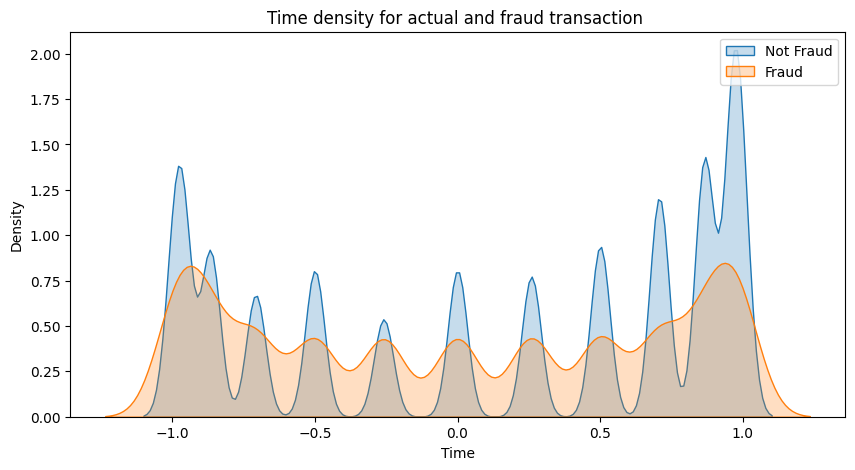

In [26]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=dataset[dataset['isFraud']==0],x='time_x',fill=True,common_norm=False,palette='crest',label='Not Fraud')
sns.kdeplot(data=dataset[dataset['isFraud']==1],x='time_x',fill=True,common_norm=False,palette='crest',label='Fraud')
plt.title('Time density for actual and fraud transaction ')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

Checking the relation between Fraud transaction based on the count of the Transactions


In [ ]:
plt.figure(figsize=(10,5))
palette={0:"blue",1:"red"}
count_feature=['count1h','count1d','count7d','c']

In [6]:
for i in dataset.columns:
  print()